# Udacity Wrangle and Analyze Data

## Gather

In this section, data is gathered:
- From three different sources (project directory, web url, and Twitter API)
- From three different file formats (.csv, .tsv, and JSON)

In [1]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import tweepy
import time
import json
import os
import io

%matplotlib inline
%config InlineBbackend.figure_format='retina'

import warnings; warnings.simplefilter('ignore')

### From project directory, read in .csv to DataFrame

In [2]:
# read twitter-archive-enhanced.csv from directory to DataFrame
df_ae = pd.read_csv('twitter-archive-enhanced.csv')

### From web url, read in .tsv to DataFrame

In [3]:
# read image-predictions.tsv from Udacity's servers
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
open(url.split('/')[-1], mode='wb').write(r.content);

# load tsv into DataFrame
df_ip = pd.read_csv(url.split('/')[-1], sep='\t')

### From Twitter API, write JSON to .txt, extract dictionary to DataFrame

Access Twitter API:

In [4]:
# to reproduce API results, set extract_from_api to True 
extract_from_api = False

# set Twitter API keys
if extract_from_api:
    consumer_key = 'Insert your consumer key here'
    consumer_secret = 'Insert your consumer secret key here'
    access_token = 'Insert your access token here'
    access_secret = 'Insert your access secret token here'
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    
    api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

Save Tweets to .txt file:

In [5]:
# save all tweets to a txt file, run only once
# takes roughly 30 minutes to build due to Twitter API Rate Limit.
if extract_from_api:
    id_errors = []

    start = time.time()
    print('Beginning Twitter Data Query...')

    with open('tweet_json.txt', 'w') as file:
        for tweet_id in list(df['tweet_id']):
            try:
                status = api.get_status(tweet_id, tweet_mode='extended')
                json.dump(status._json, file)
                file.write('\n')
            except:
                id_errors.append(tweet_id)

    end = time.time()
    print('Finished.  This took {}.'.format(end - start))

Read .txt file, import JSON, extract dictionary and convert to DataFrame:

In [6]:
# read all tweets from txt file to DataFrame
df_tj = pd.DataFrame()

# open text file
with open('tweet_json.txt', encoding='utf8', mode='r') as json_file:
    
    # iterate through each line
    for line in json_file:
        
        # read each json line into a dictionary
        data = json.loads(json_file.readline())
        
        # add the id, favorite_count, and retweet_count into a DataFrame
        line_df = pd.DataFrame.from_records([{'tweet_id': data['id'], 
                                              'favorite_count': data['favorite_count'], 
                                              'retweet_count': data['retweet_count']}])
        
        # append the row to the master DataFrame
        df_tj = df_tj.append(line_df)

df_tj.reset_index(drop=True, inplace=True)
df_tj.to_csv('tweet_json.csv', index=False)

## Assess
In this section, data is assessed:
- Visually: Within this Jupyter Notebook and in an external application such as Excel
- Programmatically: Using pandas functions

From the Project Motivation's Key Points, at least 8 data quality issues and at least 2 tidiness isuess will be summarized.

In [7]:
# head to view first few rows of each DataFrame
df_ae.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
df_ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
df_tj.head()

,favorite_count,retweet_count,tweet_id
0,32162,6029,892177421306343426
1,40731,8301,891689557279858688
2,19567,2985,891087950875897856
3,63105,18106,890729181411237888
4,30872,7076,890240255349198849


In [10]:
# view summary of each DataFrame
df_ae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
df_tj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 3 columns):
favorite_count    1167 non-null int64
retweet_count     1167 non-null int64
tweet_id          1167 non-null int64
dtypes: int64(3)
memory usage: 27.4 KB


In [13]:
# view statistic summaries of numeric columns for each DataFrame
df_ae.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
df_ip.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
df_tj.describe()

,favorite_count,retweet_count,tweet_id
count,1167.000000,1167.000000,1.167000e+03
mean,7545.076264,2719.807198,7.418967e+17
std,12056.192499,4445.327737,6.818318e+16
min,0.000000,1.000000,6.660209e+17
25%,1285.500000,563.500000,6.782950e+17
50%,3288.000000,1246.000000,7.184547e+17
75%,8820.000000,3165.500000,7.986469e+17
max,137864.000000,59850.000000,8.921774e+17


In [16]:
# explore ratings
df_ae.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
df_ae.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
# count dog names
df_ae.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
Bailey         7
Daisy          7
Buddy          7
Toby           7
an             7
Leo            6
Jax            6
Milo           6
Rusty          6
Koda           6
Scout          6
Oscar          6
Stanley        6
Jack           6
Dave           6
Bella          6
very           5
            ... 
Lizzie         1
Carter         1
Meera          1
Lipton         1
Jareld         1
Diogi          1
Tiger          1
Tilly          1
Skittle        1
Pavlov         1
Chaz           1
Dale           1
Jay            1
Napolean       1
Alexander      1
Jeb            1
Brandy         1
Juckson        1
Arlo           1
Cheesy         1
life           1
Willie         1
Sonny          1
BeBe           1
Reagan         1
Staniel        1
Tobi           1
Jebberson     

In [19]:
# check for duplicate tweets
df_ip.tweet_id.duplicated().sum(), df_tj.tweet_id.duplicated().sum(), df_ae.tweet_id.duplicated().sum()

(0, 0, 0)

In [20]:
# how many image predictions are not dogs?
df_ip.query('(p1_dog == False) and (p2_dog == False) and (p3_dog == False)').count()

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

### Quality Issues
#### Completeness
1. `df_ae`: Missing and incorrect dog names
2. `df_ae`: Benebop Cumberfloof not identified as floofer
3. `df_tj`: Extracting nested dictionaries/lists from JSON creates messy data. (*not resolved*)

#### Validity
4. `df_ae`: Retweets may capture the same dog twice with a different tweet_id
5. `df_ae`: Replies do not have images
6. `df_ip`: 324 predictions where the top 3 predictions are not dog breeds.  Sampling data reveals turtles, fish, sloth, etc.

#### Accuracy
7. `df_ae`: Rating numerator and denominator have many outliers
8. `df_ae`: Rating denominator catches other `/` in different context: such as multiple dogs, halves, 24/7, dates, etc. (*not resolved*)

#### Consistency
9. `df_ae`: Timestamp column is a string
10. `df_ae`: Source displays url
11. `df_ip`: Nondescriptive columns (*not resolved*)

### Tidiness Issues

#### Each variable forms a column
11. `df_ip`: Four columns for stages of dog (doggo, pupper, puppo, floofer) should be one category column

#### Each observation forms a row
- N/A

#### Each type of observational unit forms a table
12. `df_ip`: Observational unit is for image prediction, `jpg_url` should be part of `df_ae` table.
13. `df_tj`: Retweet and favorite should be appended to `df_ae` table.

## Clean
Copies of the original pieces of data are made prior to cleaning.

Issues identified in the assessment phase will be cleaned.

Tidy master datasets will be created.

In [21]:
df_ae_clean = df_ae.copy()
df_ip_clean = df_ip.copy()
df_tj_clean = df_tj.copy()

#### Define
- From `df_ae`, find and replace dog names with 'None' if possible.
- It appears that names that are lowercase tend to be invalid.  Find and replace lowercase dog "names" if possible.
- Replace with NaN if no name is found.
- Resolves Issue #1

#### Code

In [22]:
# number of 'none' dog names
(df_ae_clean.name == 'None').sum()

745

In [23]:
# list of lowercase dog names and 'None'
lower_list = list(df_ae_clean[df_ae_clean.name.str.islower()].name.value_counts().index)
lower_list.append('None')
lower_list

['a',
 'the',
 'an',
 'very',
 'just',
 'quite',
 'one',
 'getting',
 'actually',
 'mad',
 'not',
 'life',
 'officially',
 'such',
 'this',
 'by',
 'my',
 'old',
 'space',
 'infuriating',
 'all',
 'his',
 'unacceptable',
 'light',
 'incredibly',
 'None']

In [24]:
# query data frame where name matches 'a' and extract names
df_extract_names = df_ae_clean[df_ae_clean.name.str.match('a')].text.str.extract(r'(named\s\w+)').dropna()
df_extract_names

,0
1853,named Wylie
1955,named Kip
2034,named Jacob
2066,named Rufus
2116,named Spork
2125,named Cherokee
2128,named Hemry
2146,named Alphred
2161,named Alfredo
2191,named Leroi


In [25]:
# slice and replace name
df_ae_clean.loc[df_extract_names.index, 'name'] = df_extract_names[0].str.slice(6)

In [26]:
# which records with name 'a' and dog name is included later in tweet
df_ae_clean[df_ae_clean.name.str.match('a')].text.str.contains('name is ')

56      False
649     False
759     False
801     False
1002    False
1004    False
1017    False
1025    False
1040    False
1049    False
1138    False
1193    False
1207    False
1340    False
1351    False
1361    False
1362    False
1368    False
1382    False
1499    False
1693    False
1737    False
1785    False
1854    False
1877    False
1878    False
1923    False
1941    False
1994    False
2153    False
2198    False
2211    False
2222    False
2287     True
2327    False
2333    False
2334    False
2335    False
2347    False
2348    False
2349    False
2350    False
2352    False
2353    False
2354    False
Name: text, dtype: bool

In [27]:
# check text for name
df_ae_clean.loc[2287].text

"This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW"

In [28]:
# fix single name entry
df_ae_clean.loc[2287, 'name'] = 'Daryl'

In [29]:
# replace all other lowercase names and 'None' with NaN
df_ae_clean.name = df_ae_clean.name.replace(lower_list, np.nan)

#### Test

In [30]:
# check cleaned names
df_ae_clean.name.value_counts()

Charlie      12
Cooper       11
Oliver       11
Lucy         11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
Sadie         8
Buddy         7
Bailey        7
Toby          7
Daisy         7
Bella         6
Jax           6
Scout         6
Rusty         6
Milo          6
Leo           6
Oscar         6
Jack          6
Dave          6
Stanley       6
Koda          6
Chester       5
Sammy         5
Gus           5
Bentley       5
Phil          5
             ..
Bubba         1
Bloop         1
Sully         1
Trevith       1
Walker        1
Kramer        1
Alexander     1
Tupawc        1
Dwight        1
Zuzu          1
Anna          1
Simba         1
Stu           1
Klint         1
Cupid         1
Arlen         1
Alejandro     1
Reptar        1
Jordy         1
Cal           1
Bowie         1
Mairi         1
Oreo          1
Blu           1
Genevieve     1
Leonidas      1
Ralph         1
Theo          1
Stormy        1
Pluto         1
Name: name, Length: 949,

#### Define
- From `df_ae`, add floofer category for 'floof' keyword
- Resolves Issue #2

#### Code

In [31]:
# find index of all tweets where the text containts 'floof'
index_floof = df_ae_clean[df_ae_clean.text.str.contains('floof')].index

In [32]:
# change 'floofer' category to 'floofer'
df_ae_clean.loc[index_floof, 'floofer'] = 'floofer'

#### Test

In [33]:
df_ae_clean.floofer.value_counts()

None       2327
floofer      29
Name: floofer, dtype: int64

#### Define

- From `df_ae`, drop retweeted columns
- Resolves Issue #4

#### Code

In [34]:
df_ae_clean = df_ae_clean[df_ae_clean.retweeted_status_id.isnull()]

#### Test

In [35]:
# confirm all retweeted rows are dropped
df_ae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1412 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [36]:
# after confirmed rows are dropped, drop the retweeted columns
df_ae_clean = df_ae_clean.drop(labels=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [37]:
# confirm retweeted columns are dropped
df_ae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1412 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


#### Define
- From `df_ae`, Drop `in_reply_to_status_id` and `in_reply_to_user_id`
- Resolves Issue #5

#### Code

In [38]:
df_ae_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

#### Test

In [39]:
df_ae_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Define
- From `df_ip`: Drop rows where all predictions of dog breed is not a dog
- Resolves Issue #6

#### Code

In [40]:
# keep rows with at least one dog prediction
df_ip_clean = df_ip_clean.query('(p1_dog != False) or (p2_dog != False) or (p3_dog != False)')

#### Test

In [41]:
df_ip_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
img_num     1751 non-null int64
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


#### Define
- From `df_ae`, keep rows where `rating_numerator` is between 1-14
- From `df_ae`, keep rows where `rating_denominator` is 10
- Resolves Issue #7

#### Code

In [42]:
# only keep rows where numerator is between 1-14 and the denominator is 10
df_ae_clean = df_ae_clean[(df_ae_clean.rating_numerator > 0) & (df_ae_clean.rating_numerator < 15) &
                          (df_ae_clean.rating_denominator == 10)]

#### Test

In [43]:
df_ae_clean.rating_numerator.value_counts()

12    500
10    442
11    425
13    307
9     155
8      98
7      53
14     43
5      36
6      32
3      19
4      15
2       9
1       7
Name: rating_numerator, dtype: int64

In [44]:
df_ae_clean.rating_denominator.value_counts()

10    2141
Name: rating_denominator, dtype: int64

#### Define
- From `df_ae`, convert timestamp to datetime
- Resolves Issue #9

#### Code

In [45]:
df_ae_clean.timestamp = pd.to_datetime(df_ae_clean.timestamp)

#### Test

In [46]:
df_ae_clean.timestamp.dtypes

datetime64[ns, UTC]

#### Define
- From `df_ae`, strip `source` to remove the HTML link.
- Resolves Issue #10

#### Code

In [47]:
# define function to strip source link
def strip_url(x):
    return x.split('>', 1)[-1][:-4]

In [48]:
# apply to source column
df_ae_clean['source'] = df_ae_clean['source'].apply(strip_url)

#### Test

In [49]:
df_ae_clean['source'].value_counts()

Twitter for iPhone     2009
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

#### Define
- Simplify 3 tables to 2 by joining (inner) `df_ae` with `df_tj` to create one tweet observation table.
- Resolves Issue #13

#### Code

In [50]:
df_ae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2141 non-null int64
timestamp             2141 non-null datetime64[ns, UTC]
source                2141 non-null object
text                  2141 non-null object
expanded_urls         2092 non-null object
rating_numerator      2141 non-null int64
rating_denominator    2141 non-null int64
name                  1406 non-null object
doggo                 2141 non-null object
floofer               2141 non-null object
pupper                2141 non-null object
puppo                 2141 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(8)
memory usage: 217.4+ KB


In [51]:
df_tj_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 3 columns):
favorite_count    1167 non-null int64
retweet_count     1167 non-null int64
tweet_id          1167 non-null int64
dtypes: int64(3)
memory usage: 27.4 KB


In [52]:
df_tweet = df_tj_clean.merge(df_ae_clean, left_on='tweet_id', right_on='tweet_id')

#### Test

In [53]:
df_tweet.head(5)

,favorite_count,retweet_count,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,32162,6029,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
1,40731,8301,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
2,19567,2985,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,None
3,63105,18106,890729181411237888,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None,None,None,None
4,30872,7076,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [54]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056 entries, 0 to 1055
Data columns (total 14 columns):
favorite_count        1056 non-null int64
retweet_count         1056 non-null int64
tweet_id              1056 non-null int64
timestamp             1056 non-null datetime64[ns, UTC]
source                1056 non-null object
text                  1056 non-null object
expanded_urls         1033 non-null object
rating_numerator      1056 non-null int64
rating_denominator    1056 non-null int64
name                  691 non-null object
doggo                 1056 non-null object
floofer               1056 non-null object
pupper                1056 non-null object
puppo                 1056 non-null object
dtypes: datetime64[ns, UTC](1), int64(5), object(8)
memory usage: 123.8+ KB


#### Define
- From `df_tweet` melt columns "doggo, floofer, pupper, puppo" into one column `dog_stage`.
- Resolves Issue #11

#### Code

In [55]:
# define melt method arguments
columns = list(df_tweet.columns)
id_vars = columns[:-4]
var_name = 'drop_column'
value_name = 'dog_stage'

In [56]:
# melt columns into one row and drop the values
df_tweet = pd.melt(df_tweet, id_vars=id_vars, var_name=var_name, value_name=value_name)
df_tweet.drop('drop_column', axis=1, inplace=True)

In [57]:
# drops duplicates for entries with 'None' as dog_stage
df_tweet.drop_duplicates(inplace=True)

In [58]:
# drops duplicate tweet_ids with valid dog_stage

# index of rows with duplicated tweet_ids and dog_stage is 'None'
valid_duplicate = df_tweet[df_tweet.tweet_id.duplicated(keep=False)].dog_stage == 'None'
valid_duplicate.index[valid_duplicate]

# drop rows
df_tweet.drop(valid_duplicate.index[valid_duplicate], axis=0, inplace=True)

#### Test

In [59]:
df_tweet.dog_stage.value_counts()

None       885
pupper     110
doggo       44
puppo       14
floofer      9
Name: dog_stage, dtype: int64

In [60]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 0 to 3585
Data columns (total 11 columns):
favorite_count        1062 non-null int64
retweet_count         1062 non-null int64
tweet_id              1062 non-null int64
timestamp             1062 non-null datetime64[ns, UTC]
source                1062 non-null object
text                  1062 non-null object
expanded_urls         1039 non-null object
rating_numerator      1062 non-null int64
rating_denominator    1062 non-null int64
name                  694 non-null object
dog_stage             1062 non-null object
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 99.6+ KB


#### Define
- From `df_ip`, move `jpg_url` column to `df_tweet`
- Reolves Issue #12

#### Code

In [61]:
df_tweet = df_tweet.merge(df_ip_clean[['tweet_id', 'jpg_url']], left_on='tweet_id', right_on='tweet_id')

In [62]:
df_ip_clean.drop('jpg_url', axis=1, inplace=True)

#### Test

In [63]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 0 to 817
Data columns (total 12 columns):
favorite_count        818 non-null int64
retweet_count         818 non-null int64
tweet_id              818 non-null int64
timestamp             818 non-null datetime64[ns, UTC]
source                818 non-null object
text                  818 non-null object
expanded_urls         818 non-null object
rating_numerator      818 non-null int64
rating_denominator    818 non-null int64
name                  590 non-null object
dog_stage             818 non-null object
jpg_url               818 non-null object
dtypes: datetime64[ns, UTC](1), int64(5), object(6)
memory usage: 83.1+ KB


In [64]:
df_ip_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 11 columns):
tweet_id    1751 non-null int64
img_num     1751 non-null int64
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
dtypes: bool(3), float64(3), int64(2), object(3)
memory usage: 128.2+ KB


## Storing

In [65]:
# sort list for aesthetics
df_tweet = df_tweet.reindex(sorted(df_tweet.columns, reverse=True), axis=1)

In [66]:
# export to csv
df_tweet.to_csv('twitter_archive_master.csv', index=False)
df_ip_clean.to_csv('twitter_image_prediction_master.csv', index=False)

## Visualize

In [67]:
favorites = df_tweet[['timestamp', 'favorite_count']].sort_values(['timestamp', 'favorite_count'])

In [68]:
window = 50
rolling_likes = favorites.favorite_count.rolling(window=window).mean()[window-1:]

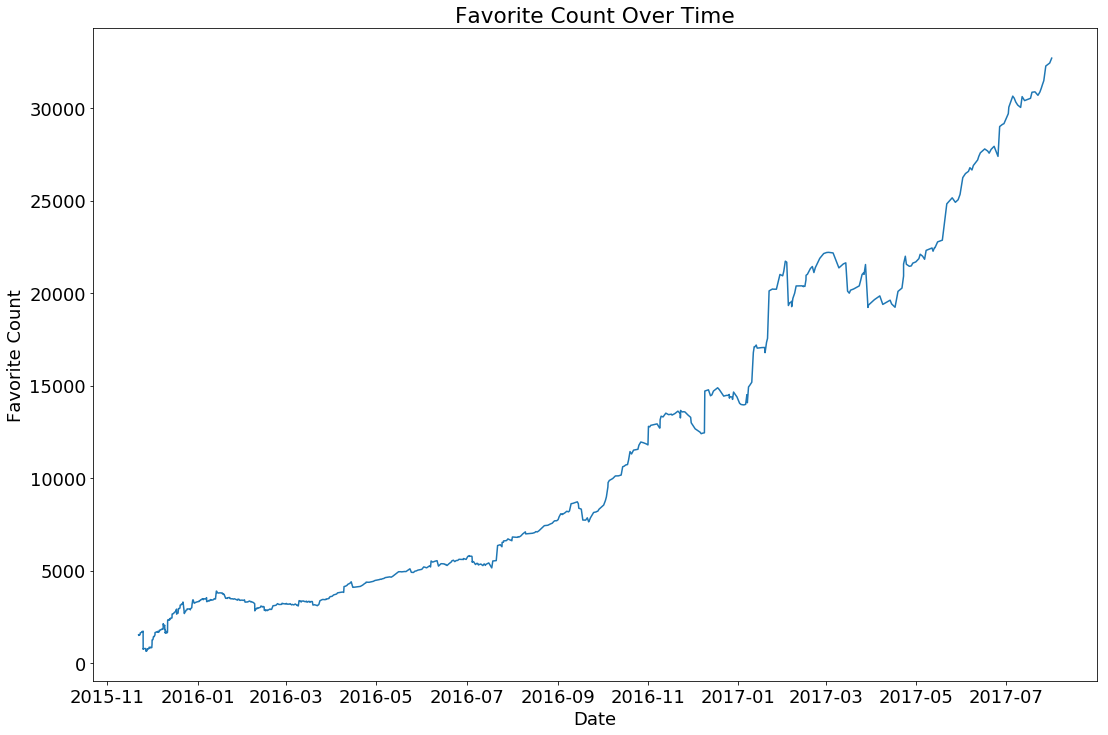

In [70]:
plt.figure(figsize=(18, 12))
plt.rcParams.update({'font.size': 18})
plt.title('Favorite Count Over Time')
plt.xlabel('Date')
plt.ylabel('Favorite Count')
plt.plot(favorites.timestamp[window-1:], rolling_likes);